In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/yogeshsaini/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [10]:
from sklearn.datasets import make_classification

In [11]:
# create the dataset
X,y =make_classification(n_samples=1000, n_features=10,  n_classes=2, random_state=42)

In [12]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
# model training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [17]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logistic.predict(X_test)
print('predictions:', y_pred)

predictions: [0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [22]:
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report, roc_auc_score, roc_curve


In [36]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)



Accuracy: 0.8466666666666667


## PERFORMING HYPER TUNING FOR THE DATA AND THE FUNCTION 

In [61]:
MODEL = LogisticRegression()
penelty = ['l1', 'l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [66]:
params = dict(penalty=penelty, C=c_values, solver=solver)

In [67]:
# gridswarchCv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedGroupKFold
cv = StratifiedGroupKFold()
Grid =GridSearchCV(estimator=MODEL, param_grid=params, scoring='accuracy', cv=cv)



In [68]:
Grid

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
Grid.best_params_

In [ ]:
Grid.best_score_

##randomaize searchingCV

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
model = LogisticRegression()

In [75]:
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, scoring='accuracy', cv=cv, random_state=42)

In [76]:
randomcv

RandomizedSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
randomcv.best_score_


<Axes: >

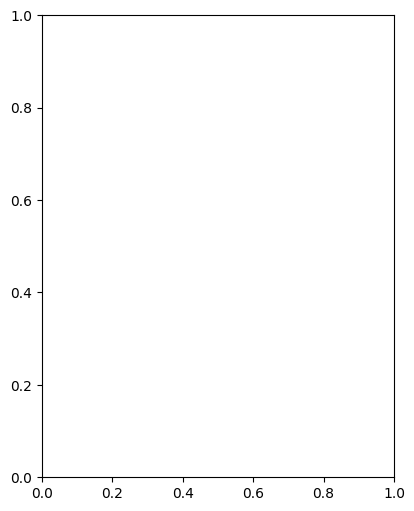

In [81]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

